In [177]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

from htmresearch.support.gridcells.random_walk import smooth_circle_walk
%load_ext autoreload
%autoreload 2

from scipy.special import i0


def convert_to_place_code(Z, C, kappa=10.0):
    d = len(Z)
    H = np.zeros((d, C.shape[0]))

    Z = (Z - 0.5)*2*np.pi
    C = (C - 0.5)*2*np.pi


    for t in range(d):
        p = np.exp(kappa*np.cos(Z[t] - C[:]))/(2*np.pi*i0(kappa))
        H[t] = p
        
    return H

# def display_W(W):

#     n = W.shape[0]
#     m = W.shape[1]
#     n_ = int(np.sqrt(n))
#     w =  int(np.sqrt(m))
#     n_0 = 0
#     img = np.concatenate([
#         np.concatenate([   W[j*n_ + i].reshape((w,w))    for i in range(n_0, n_) ])
#         for j in range(n_0, n_)], axis=1)
    
#     return img

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


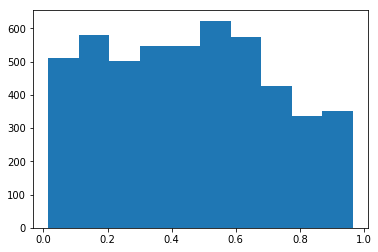

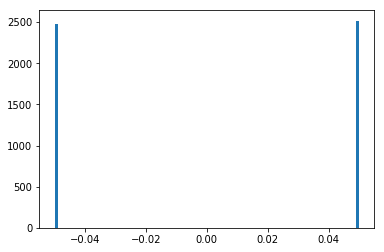

(500000, 100)
(500000, 1)


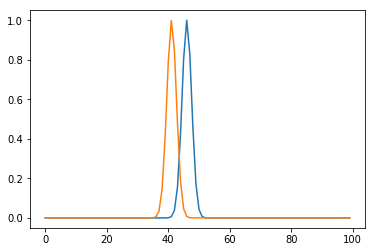

In [297]:
w = 100
d = 500000

# ------------------------
# Computing the torus walk
# ------------------------

Z, V = smooth_circle_walk(d, start=None, min_speed=0.05, max_speed=0.05)
Z = Z[:,0]

# ------------------------
# Computing the 
# place cell code
# ------------------------
C = np.linspace(0,1,num=w)

X = convert_to_place_code(Z, C, kappa=100.0)
X -= np.amin(X)
X /= np.amax(X)

plt.hist(Z[:5000])
plt.show()
plt.hist(V[:5000], bins=100)
plt.show()
plt.plot(X[0])
plt.plot(X[1])
print X.shape
print V.shape

In [305]:
from htmresearch.support.gridcells.models.spread_and_align import SpreadAndAlignModel as SAM
%load_ext autoreload
%autoreload 2


model_parameters = {
    'num_place_cells'   : 100,
    'num_grid_cells'    : 20,
    'num_velocity_cells': 1,
    'prediction_loss_weight': 1.0,
    'sparseness_loss_weight': 1.0,
    'spread_loss_weight'    : 1.0,
    'code_weight'  : 5.0,
    'spread_weight': 2.,
    'learning_rate': 0.01,
    'optimizer': 'gradient',
    'beta': 0.01
}

model = SAM(model_parameters)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(100, 1) (20, 1)


(20, 100)


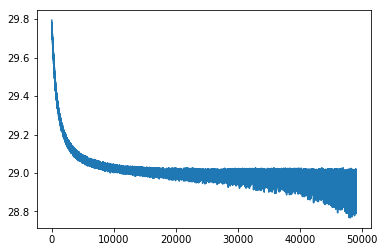

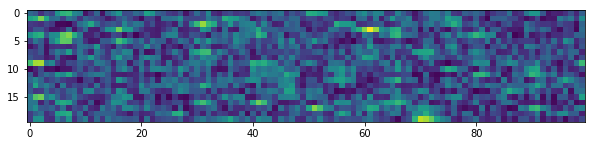

In [306]:
d = 50000
losses = model.fit(data={"X": X[:d], "V": V[:d]})
plt.plot(losses[1000:])

W   = model.fwd_weights
print W.shape

plt.figure(figsize=(10,10))
plt.imshow(W)


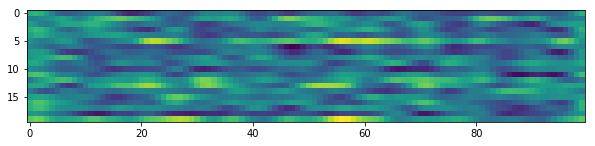

In [304]:
from scipy.special import expit as sigmoid
plt.figure(figsize=(10,10))



X_test = convert_to_place_code(np.linspace(0,1,num=100),  np.linspace(0,1,num=w), kappa=100.0)
X_test -= np.amin(X_test)
X_test /= np.amax(X_test)

T=100
Y = np.zeros((T, model.num_grid_cells))

# print model.get_boost()

for t in range(T):
    Y[t,:] = model.get_boost().reshape(-1)*sigmoid(  np.dot(W, X_test[t]) )
#     Y[t,:] = sigmoid(  np.dot(W, X_test[t]) )
    
plt.imshow(Y.T)